Importing the Libraries for Data-Description

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression

Read the data from 'dataset.csv' file and create a dataframe

In [2]:
df = pd.read_csv('dataset.csv')
df.shape

(5707, 4)

In [3]:
df.head()

,Current Domain Age,Matching Domain Name,Length of Domain,Result
0,1,1,1,1
1,1,-1,1,1
2,1,-1,1,1
3,-1,-1,-1,1
4,1,-1,1,1


In [4]:
df.columns

Index(['Current Domain Age', 'Matching Domain Name', 'Length of Domain',
       'Result'],
      dtype='object')

As the column names have leading white spaces, we will rename the columns

As we had merged two csv files to create a dataset, we need to check the unique values present in each column

In [5]:
# Investigate unique values in the each column
unique_Domain_Age = df['Current Domain Age'].unique()
unique_Domain_Name = df['Matching Domain Name'].unique()
unique_Length_Domain = df['Length of Domain'].unique()
unique_R = df['Result'].unique()

In [6]:
print(unique_Domain_Age)
print(unique_Domain_Name)
print(unique_Length_Domain)
print(unique_R)

['1' '-1' '0' 'Current Domain Age']
['1' '-1' '0' 'Matching Domain Name']
['1' '-1' '0' 'Length of Domain']
['1' 'Result' '-1']


As there are white-space along with 1, 0, and -1 we need to remove rest of the things, and then convert the values to int 

In [7]:
validValues = {-1, 0, 1}

for column in df.columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')
    df = df[df[column].isin(validValues)]

# Convert all columns to integers (again after the filtering)
df = df.astype(int)

In [8]:
# Now you can use the DataFrame with valid integer values (1, -1, and 0)
print(df)

      Current Domain Age  Matching Domain Name  Length of Domain  Result
0                      1                     1                 1       1
1                      1                    -1                 1       1
2                      1                    -1                 1       1
3                     -1                    -1                -1       1
4                      1                    -1                 1       1
...                  ...                   ...               ...     ...
5702                   1                    -1                 1      -1
5703                   1                    -1                 1      -1
5704                   0                     0                 0      -1
5705                   1                    -1                 1      -1
5706                   1                    -1                 1      -1

[5706 rows x 4 columns]


Again check for the unique values present in each column

In [9]:
# Investigate unique values in the each column
unique_Domain_Age = df['Current Domain Age'].unique()
unique_Domain_Name = df['Matching Domain Name'].unique()
unique_Length_Domain = df['Length of Domain'].unique()
unique_R = df['Result'].unique()

print(unique_Domain_Age)
print(unique_Domain_Name)
print(unique_Length_Domain)
print(unique_R)

[ 1 -1  0]
[ 1 -1  0]
[ 1 -1  0]
[ 1 -1]


In [10]:
df.shape

(5706, 4)

In [11]:
print("number of 1",len(df[df["Result"]==1]))
print("number of -1",len(df[df["Result"]==-1]))

number of 1 3287
number of -1 2419


We now find the correlation between the columns values

In [12]:
corr=df.corr()
corr

,Current Domain Age,Matching Domain Name,Length of Domain,Result
Current Domain Age,1.000000,-0.103153,0.627861,0.252931
Matching Domain Name,-0.103153,1.000000,-0.178523,0.159789
Length of Domain,0.627861,-0.178523,1.000000,0.080454
Result,0.252931,0.159789,0.080454,1.000000


<Axes: >

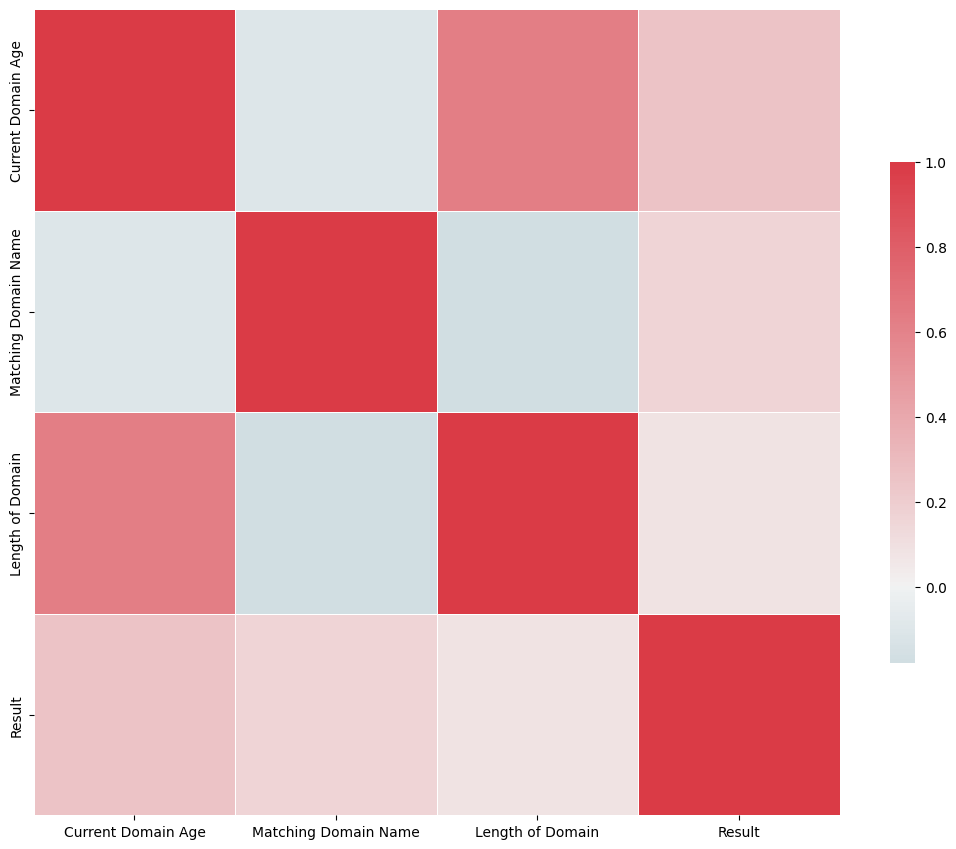

In [13]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(13, 13))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})